# Run MCP counter on TCGAov samples

Script related to figure 3b

### Aim:
- Estimate cells of the tumour microenvironment using MCP counter

In [1]:
sessionInfo()

R version 3.5.0 (2018-04-23)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.5.0  IRdisplay_0.6.1 pbdZMQ_0.3-3    tools_3.5.0    
 [5] htmltools_0.3.6 base64enc_0.1-3 crayon_1.3.4    Rcpp_1.0.1     
 [9] uuid_0.1-2      IRkernel_0.8.14 jsonlite_1.6    digest_0.6.18  
[13] repr_0.17       evaluate_0.13  

## Install packages

In [ ]:
#install.packages(c("curl","devtools"))

In [ ]:
#library(devtools)

In [ ]:
#install_github("ebecht/MCPcounter",ref="master", subdir="Source")

## Load packages

In [1]:
library(curl)
library(MCPcounter)

In [2]:
setwd("~/git_repos/HGSOC_TME_Heterogeneity/Scripts/3/")

## Load expression data

In [4]:
TCGAov_data <- read.table('../../Data/1/TCGAov_RNAseq.txt',
                           header=T,
                           sep='\t',
                           row.names='GeneSymbol')

In [5]:
head(TCGAov_data)

,TCGA.04.1348.01,TCGA.04.1357.01,TCGA.04.1362.01,TCGA.04.1364.01,TCGA.04.1365.01,TCGA.04.1514.01,TCGA.04.1519.01,TCGA.09.0364.01,TCGA.09.0366.01,TCGA.09.0367.01,⋯,TCGA.61.2102.01,TCGA.61.2104.01,TCGA.61.2109.01,TCGA.61.2110.01,TCGA.61.2111.01,TCGA.61.2113.01,TCGA.OY.A56P.01,TCGA.OY.A56Q.01,TCGA.VG.A8LO.01,TCGA.WR.A838.01
A1BG,66.4695,65.5664,41.6412,187.0368,23.9295,32.8123,46.3418,162.8522,88.5518,192.7354,⋯,63.7012,99.1485,38.3684,140.3668,94.7103,70.4394,43.1736,33.6854,27.9604,16.2092
A1BG-AS1,36.3243,28.1315,23.2465,114.6008,10.4957,20.1900,17.2007,83.0906,65.6758,55.1265,⋯,30.3602,71.1797,26.0239,77.2415,61.4890,106.1623,47.8864,25.3482,17.9853,42.9450
A1CF,0.0000,0.0000,0.3310,0.0000,0.0000,0.0000,0.0000,0.9034,0.0000,0.0000,⋯,0.0000,0.0000,0.0000,1.9057,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A2M,5899.8279,9384.4401,3350.4207,1455.2316,3999.3792,3224.5797,1986.1593,1487.3247,10557.8325,4603.9013,⋯,10264.1373,7220.7664,7200.1144,1819.9428,6179.7358,5365.7972,8773.5936,10006.7877,1888.1746,4205.6055
A2M-AS1,118.4566,111.0026,71.3613,67.8607,52.1501,224.7582,182.0650,120.2838,53.6419,92.9112,⋯,146.6130,45.8648,64.4638,28.5565,100.6605,23.5625,84.2153,582.3492,59.8084,143.4910
A2ML1,7.5289,54.6875,5.6263,5.0883,3.3148,3.7421,6.2305,278.2486,4.7763,653.6058,⋯,1.7993,4.6124,0.4768,17.1510,15.6109,2.4461,98.3162,269.5768,4.5092,224.5290


## MCP counter

In [7]:
?MCPcounter.estimate

In [9]:
probesets <- "http://raw.githubusercontent.com/ebecht/MCPcounter/master/Signatures/probesets.txt"
genes <- "http://raw.githubusercontent.com/ebecht/MCPcounter/master/Signatures/genes.txt"

MCP_result = MCPcounter.estimate(TCGAov_data,
                                 featuresType=c("affy133P2_probesets",
                                                "HUGO_symbols",
                                                "ENTREZ_ID")[2],
                                 probesets=read.table(curl(probesets),
                                                      sep="\t",
                                                      stringsAsFactors=FALSE,
                                                      colClasses="character"),
                                 genes=read.table(curl(genes),
                                                  sep="\t",
                                                  stringsAsFactors=FALSE,
                                                  header=TRUE,
                                                  colClasses="character",
                                                  check.names=FALSE))

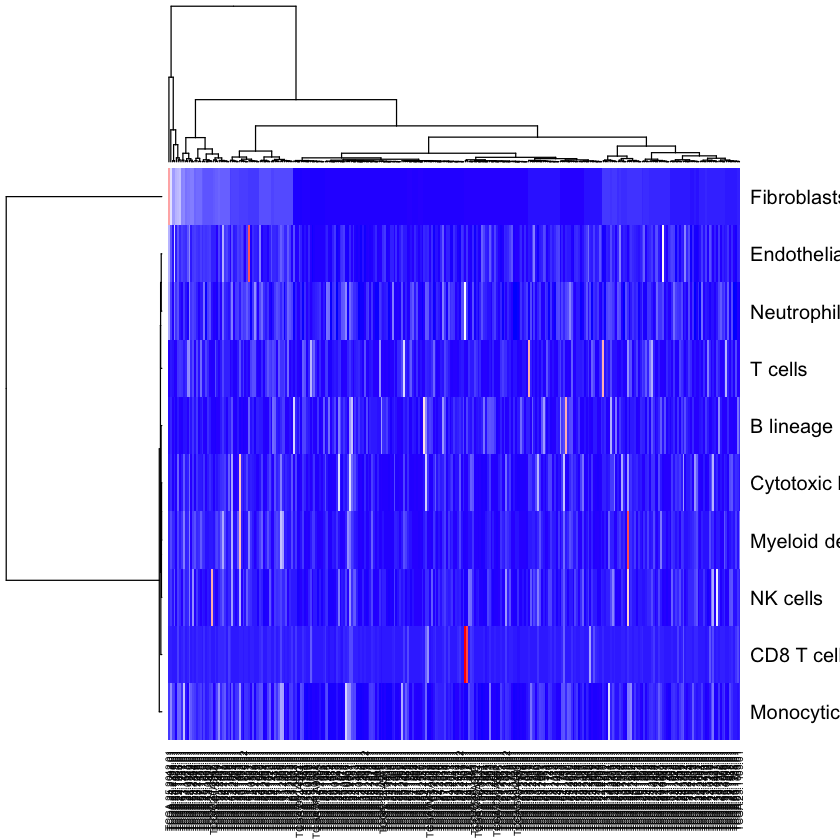

In [10]:
heatmap(as.matrix(MCP_result),
        col=colorRampPalette(c("blue","white","red"))(100))

In [ ]:
head(MCP_result)

In [11]:
MCP_result <- data.frame("Term"=rownames(MCP_result),
                         MCP_result)

rownames(MCP_result) <- NULL

In [12]:
head(MCP_result)

Term,TCGA.04.1348.01,TCGA.04.1357.01,TCGA.04.1362.01,TCGA.04.1364.01,TCGA.04.1365.01,TCGA.04.1514.01,TCGA.04.1519.01,TCGA.09.0364.01,TCGA.09.0366.01,⋯,TCGA.61.2102.01,TCGA.61.2104.01,TCGA.61.2109.01,TCGA.61.2110.01,TCGA.61.2111.01,TCGA.61.2113.01,TCGA.OY.A56P.01,TCGA.OY.A56Q.01,TCGA.VG.A8LO.01,TCGA.WR.A838.01
T cells,140.379514,284.69122,217.392593,41.826871,167.179664,80.249193,62.8456857,55.527121,83.974364,⋯,33.929664,132.948129,149.716307,114.2721,151.90634,92.076529,49.997771,41.986000,97.385329,129.867629
CD8 T cells,82.011300,326.82290,5.295300,19.929100,66.295000,4.317800,1.7802000,3.613600,27.747800,⋯,2.998800,20.933100,7.152100,2.3821,130.29120,34.594200,3.473100,3.332200,5.475500,0.384500
Cytotoxic lymphocytes,122.446500,289.74794,20.046643,1.877800,107.277386,11.226243,8.6464571,2.968329,28.007686,⋯,11.138529,26.204414,47.407886,10.9576,31.05031,28.477571,12.022371,1.999329,7.638071,6.865486
NK cells,5.310562,10.82355,5.088475,4.187238,7.533513,1.619175,0.6119375,1.580963,8.036325,⋯,2.024225,5.047013,5.006437,3.0967,3.93875,5.066825,1.936937,1.249575,3.985825,1.778163
B lineage,61.407637,220.78453,38.763562,98.479450,92.021987,155.476413,221.4619625,90.735700,73.548650,⋯,162.011975,66.391712,209.316750,149.5950,89.46261,67.004463,11.721813,167.610787,74.160575,200.836225
Monocytic lineage,552.419614,897.16706,313.796143,114.849786,462.092157,87.301586,175.5521571,49.922786,1983.153143,⋯,611.463857,625.357957,335.669671,198.3938,434.25227,624.635243,109.269900,153.032786,72.239557,61.240200


### Save results

In [13]:
write.table(MCP_result,
            file='../../Data/3/MCPcounterImmuneCells_TCGAov_Results.txt',
            sep='\t',
            row.names=FALSE)

# End script